# Predicting Next Day Rain in Australia
## DTSA 5509 Supervised Learning Final Project
## Project Topic
The goal of this project is to develop a Supervised Learning approach to a Binary Classification problem of predicting whether or not it rained the next day given a current day's weather observations.  
This project is a fun task because weather predictions are historically "iffy" and draw a lot of controversy. It will also be very interesting to see what factors play most into the outcome of whether it rains or not. Here are some more broader motivations and objectives behind using this dataset and solving this problem:  
- Importance of the Project:
    1. Weather Prediction Accuracy: Accurate weather forecasts are crucial for a wide range of sectors, including agriculture, aviation, transportation, and event planning. By improving the accuracy of rain prediction, this project can significantly benefit these industries by allowing for better planning and decision-making processes.

    2. Disaster Preparedness: Predicting rain, especially heavy rainfall, can be vital in disaster management and preparedness. Accurate predictions can help in early warnings for floods, landslides, and other weather-related disasters, potentially saving lives and reducing economic losses.

    3. Resource Management: For water-sensitive industries like agriculture and water management, knowing the likelihood of rain can help in efficient resource allocation, such as irrigation planning and water conservation efforts.

    4. Climate Change Insights: Analyzing and predicting weather patterns over time can also provide valuable insights into climate change's effects on local weather phenomena, including changes in rainfall patterns.

- Goals of the Project:
    1. Predictive Modeling: The primary goal is to build a machine learning model that can accurately predict whether it will rain tomorrow based on today's weather conditions. This involves selecting the right model (e.g., Random Forest), tuning parameters, and validating the model's performance.

    2. Data Cleaning and Preprocessing Skills: Working with real-world data sets like this one provides an excellent opportunity to practice and enhance data cleaning and preprocessing skills, which are crucial in any data science project. This includes handling missing data, dealing with outliers, and feature engineering.

    3. Understanding Feature Importance: Through this project, the author aims to identify which features (e.g., humidity, pressure, temperature) are most predictive of rainfall. This not only improves the model's performance but also provides insights into the physical factors that influence rain.

    4. Exploratory Data Analysis (EDA): The project offers the chance to conduct thorough EDA to understand the data's underlying patterns, distributions, and relationships between different weather variables.

    5. Learning and Applying Advanced Machine Learning Techniques: Beyond building a predictive model, the project can be a platform for experimenting with advanced techniques such as ensemble methods, cross-validation, and hyperparameter optimization to improve prediction accuracy.

    6. Impactful Application of Machine Learning: Finally, the project serves as a practical example of how machine learning can be applied to solve real-world problems, demonstrating the impact of predictive analytics on everyday life and decision-making processes.  

In summary, a machine learning project using the "Rain in Australia" dataset is not just an academic exercise but a practical exploration with the potential for significant real-world impact. It embodies the core of data science: extracting meaningful insights from data and applying them to predict and influence outcomes in various aspects of life and industry.

## Data

The dataset I have chosen for this project comes from [Kaggle](https://www.kaggle.com/), which is a data science competition platform and online community of data scientists and machine learning practitioners. It is called the [Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data) dataset. It contains about 10 years (10/30/2007 - 06/23/2017) of daily weather observations from many locations across Australia. The target variable to predict is RainTomorrow. It determines, did it rain the next day, Yes or No?. If the value is Yes, then the rain for that day was 1mm or more.  

The total dataset is 4 MB. There are 145,460 samples/rows and 23 features/columns including the target variable (RainTomorrow). A few descriptions of the columns and their data types:
- Date
    - Dtype: object
    - Description: The date of observation
- Location:
    - Dtype: object
    - Description: The common name of the location of the weather station
- MinTemp:
    - Dtype: float64
    - Description: The minimum temperature in degrees celsius
- MaxTemp:
    - Dtype: float64
    - Description: The maximum temperature in degrees celsius
- Rainfall:
    - Dtype: float64
    - Description: The amount of rainfall recorded for the day in mm
- Evaporation:
    - Dtype: float64
    - Description: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- Sunshine:
    - Dtype: float64
    - Description: The number of hours of bright sunshine in the day
- WindGustDir:
    - Dtype: object
    - Description: The direction of the strongest wind gust in the 24 hours to midnight
- WindGustSpeed:
    - Dtype: object
    - Description: The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- WindDir9am:
    - Dtype: float64
    - Description: Direction of the wind at 9am
- WindDir3pm:
    - Dtype: float
    - Description: Direction of the wind at 3pm
- Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm: All have a dtype of object
- RainToday, RainTomorrow: Have a dtype of object

#### Source & Acknowledgements
Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data.
An example of latest weather observations in Canberra: http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml

Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml
Data source: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.

Copyright Commonwealth of Australia 2010, Bureau of Meteorology.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
try:
    from imblearn.over_sampling import SMOTE
except:
    !pip install imblearn
    from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
try:
    from xgboost import XGBClassifier
except:
    !pip install xgboost
    from xgboost import XGBClassifier

In [2]:
# Read in the data
df = pd.read_csv("weatherAUS.csv")

In [3]:
# Confirming the shape of the data
df.shape

(145460, 23)

In [4]:
# Confirming columns in the dataset
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [5]:
# Getting a glimpse at the data
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Exploratory Data Analysis (EDA)

The EDA process involves summarizing the main characteristics of the dataset through visual and statistical methods. This includes analyzing the distribution of key features, identifying relationships between variables, and detecting outliers or anomalies.  

The purpose is to understand the data better, uncover underlying patterns, inform feature selection and engineering, and guide the modeling strategy. It helps in identifying potential issues such as missing values, data imbalance, or the need for data transformation.

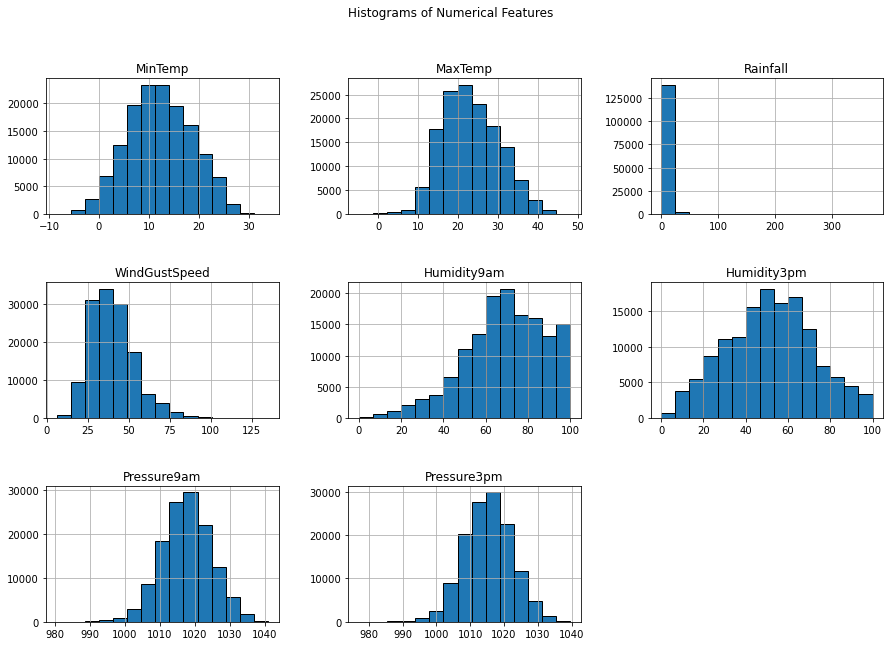

In [6]:
# Selecting a subset of numerical columns for simplicity
numerical_columns_subset = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']
# Plot histograms for selected numerical features
df[numerical_columns_subset].hist(bins=15, figsize=(15, 10), layout=(3, 3), edgecolor='black')
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Histograms of Numerical Features')
plt.show()

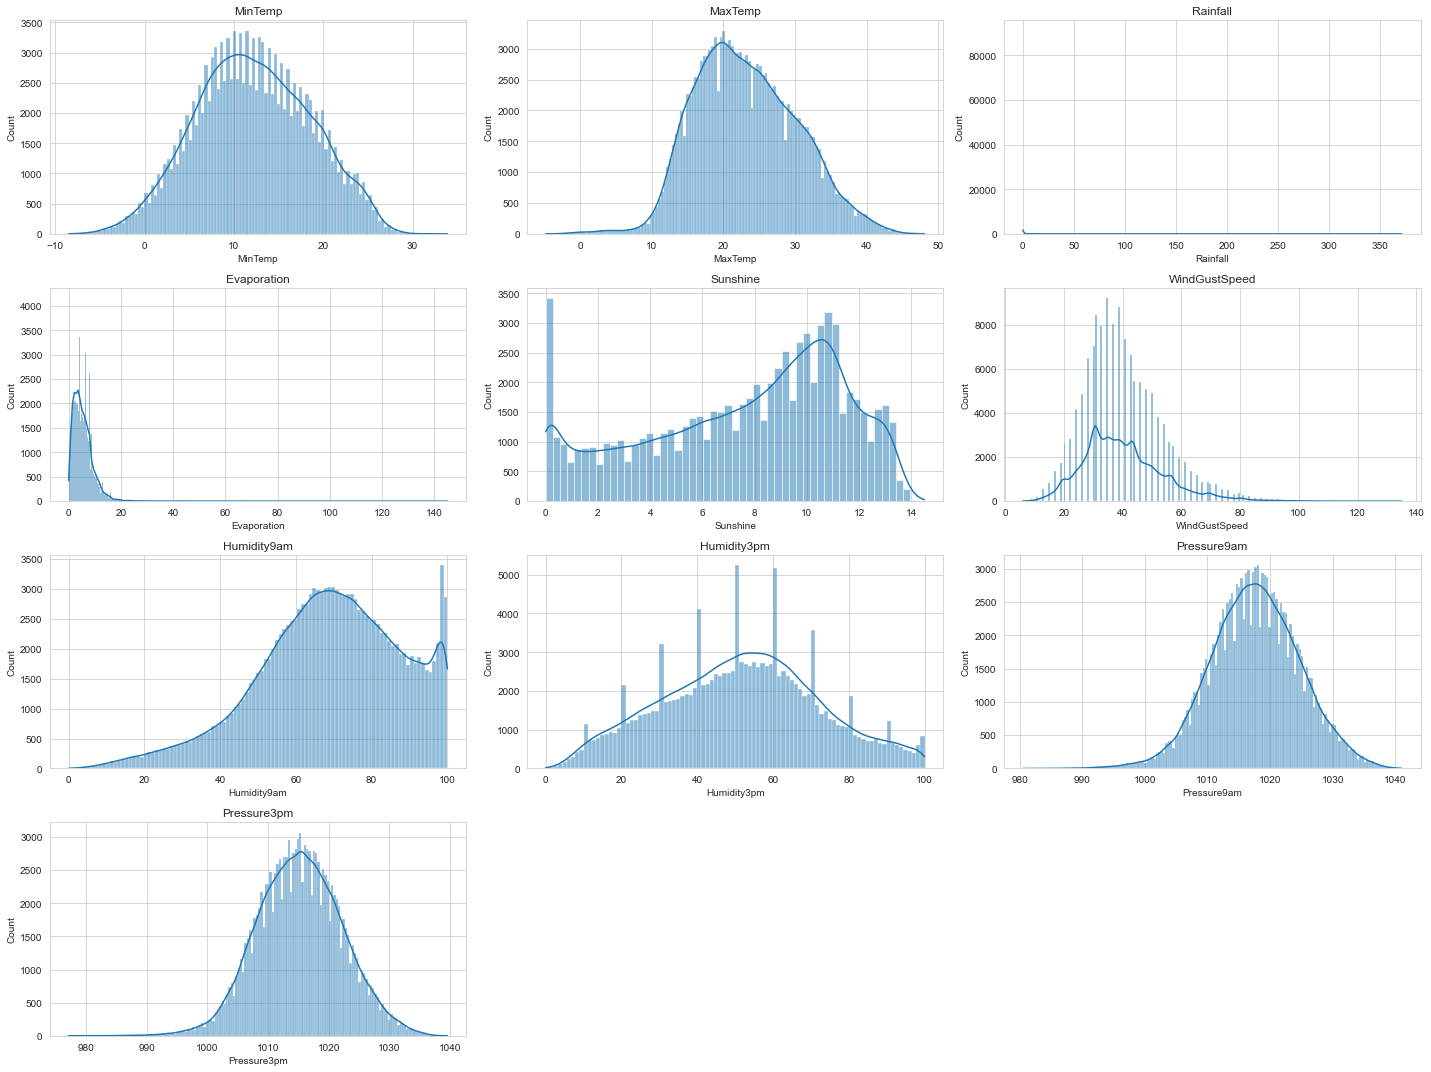

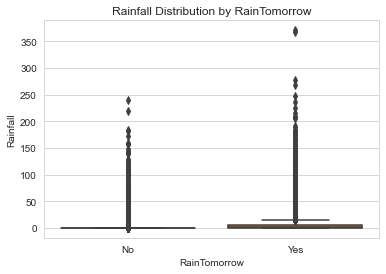

In [7]:
# Set the style of seaborn for plotting
sns.set_style("whitegrid")

# Choose a subset of columns for EDA to avoid too many subplots at once
subset_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'RainToday']

# Plot histograms for numerical features to understand distributions
plt.figure(figsize=(20, 15))
for i, column in enumerate(subset_columns[:-1], 1):  # Exclude 'RainToday' for now as it's categorical
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

# Boxplot for categorical feature 'RainToday' against 'Rainfall' to see distribution of rainfall on rain/no rain days
plt.figure(figsize=(6, 4))
sns.boxplot(x='RainTomorrow', y='Rainfall', data=df)
plt.title('Rainfall Distribution by RainTomorrow')
plt.show()

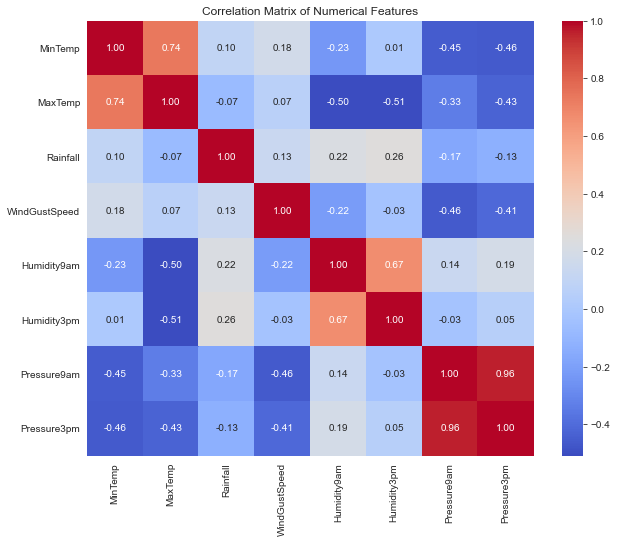

In [8]:
# Correlation matrix heatmap for numerical features
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_columns_subset].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

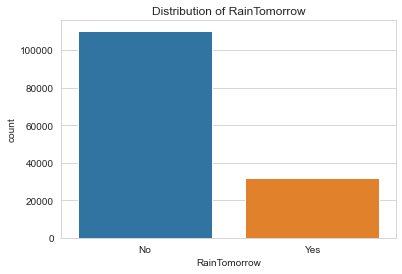

In [9]:
# Checking the balance of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribution of RainTomorrow')
plt.show()

### EDA Conclusions:

- Summary: The dataset shows a variety of distributions among numerical features, with some exhibiting skewness. Certain features like humidity and pressure show moderate correlations with the target variable, suggesting potential predictive power.  
- Findings: Preliminary findings might indicate the need for data cleaning (handling missing values and outliers) and feature engineering (creating new features or transforming existing ones).  
- Foreseen Difficulties: Challenges may include dealing with imbalanced data, handling missing data without losing too much information, and selecting or engineering features to improve model performance.  
- Analysis Strategy: Based on the EDA, the strategy might involve normalizing skewed distributions, encoding categorical variables, dealing with class imbalance (e.g., using SMOTE), and applying feature selection techniques to identify the most informative features for modeling.

## Data Cleaning

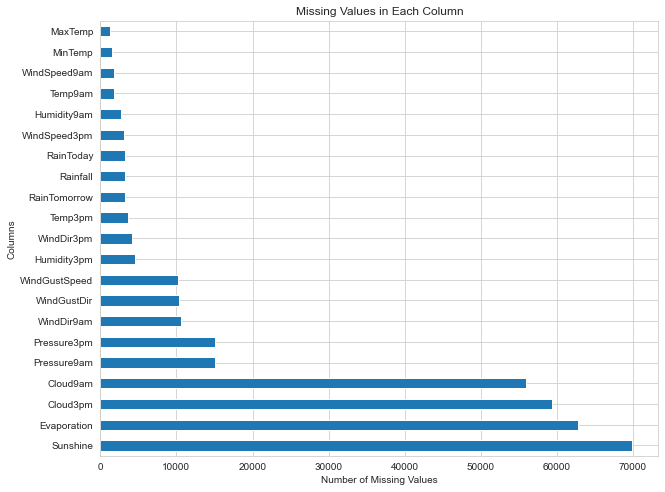

In [10]:
# Handling Missing Values
# Checking for missing values in the dataset
missing_values = df.isnull().sum().sort_values(ascending=False)

# Plotting the missing values to visualize which columns have the most missing data
plt.figure(figsize=(10, 8))
missing_values[missing_values > 0].plot(kind='barh')
plt.title('Missing Values in Each Column')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.show()

#### Dealing with missing values

The visualization of missing values reveals that some columns, such as `Sunshine`, `Evaporation`, `Cloud9am`, and `Cloud3pm`, have a significant amount of missing data. Handling these missing values is crucial for the accuracy of our machine learning model.  

1. Strategy for Columns with High Missing Values: For columns with a very high percentage of missing values (e.g., Sunshine, Evaporation), one approach could be to drop these columns if they are not critical to our prediction. However, considering the importance of every weather-related feature in predicting rain, an alternative approach is to impute these missing values. Given the complexity of weather data, simple imputation methods might not be sufficient. Advanced techniques like K-Nearest Neighbors (KNN) imputation could be considered, but they are computationally intensive. A compromise is to use median imputation for numerical features because it's robust to outliers, which are common in weather data.

2. Drop Target Variable Missing Values: Since RainTomorrow is our target variable, values will be removed because they cannot be used in training or testing.

In [11]:
# Dropping columns with high missing values for simplicity and computational efficiency
columns_to_drop = ['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm']
df_cleaned = df.drop(columns=columns_to_drop)

# Imputing missing values for numerical columns with their median values
numerical_columns = df_cleaned.select_dtypes(include=['float64']).columns
df_cleaned[numerical_columns] = df_cleaned[numerical_columns].apply(lambda x: x.fillna(x.median()),axis=0)

# For categorical features, impute missing values with the mode (most frequent value)
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]),axis=0)

# Dropping rows with missing target variable 'RainTomorrow'
df_cleaned.dropna(subset=['RainTomorrow'], inplace=True)

# Re-checking for missing values after cleaning
missing_values_cleaned = df_cleaned.isnull().sum().sort_values(ascending=False)

print(missing_values_cleaned)

Date             0
WindSpeed3pm     0
RainToday        0
Temp3pm          0
Temp9am          0
Pressure3pm      0
Pressure9am      0
Humidity3pm      0
Humidity9am      0
WindSpeed9am     0
Location         0
WindDir3pm       0
WindDir9am       0
WindGustSpeed    0
WindGustDir      0
Rainfall         0
MaxTemp          0
MinTemp          0
RainTomorrow     0
dtype: int64


#### Transform Non-Numerical Columns

1. I chose to break the `Date` column into three separate columns for two reasons:
    - Seasonality: Weather patterns are often seasonal, so the month and possibly the year could be predictive of whether it will rain tomorrow. This transformation allows the model to capture seasonal effects that might be missed if the date were left as a single feature.
    - Day of the Month: While possibly less predictive than the month or year, the day of the month could capture information related to more short-term weather cycles.  
2. Map `RainToday` and `RainTomorrow` to be 0 for No, and 1 for Yes
3. One-hot encode categorical variables (excluding `Date` since it has been transformed and dropped already)

In [12]:
# Convert 'Date' into datetime format and extract 'Year', 'Month', and 'Day'
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_cleaned['Year'] = df_cleaned['Date'].dt.year
df_cleaned['Month'] = df_cleaned['Date'].dt.month
df_cleaned['Day'] = df_cleaned['Date'].dt.day

# Now drop the original 'Date' column
df_cleaned.drop('Date', axis=1, inplace=True)

# Manually encode 'RainToday' and 'RainTomorrow' using a mapping
rain_mapping = {'No': 0, 'Yes': 1}
df_cleaned['RainToday'] = df_cleaned['RainToday'].map(rain_mapping)
df_cleaned['RainTomorrow'] = df_cleaned['RainTomorrow'].map(rain_mapping)

# For other categorical columns, use one-hot encoding
# First, select categorical columns (excluding 'RainToday' and 'RainTomorrow')
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns.difference(['RainToday', 'RainTomorrow'])

# Apply one-hot encoding
df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_columns)

#### Balancing the target variable
The distribution of the target variable RainTomorrow shows an imbalance. While many machine learning models, including Random Forest, can handle imbalanced data to some extent, extreme imbalances can lead to poor model performance, especially for the minority class.  

1. Strategies to Address Imbalance: Depending on the severity of the imbalance, techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or adjusting the class weight parameter in the model could be considered to improve model performance on the minority class.

#### Splitting into train and test sets
- After applying SMOTE I will transform the data into train and test sets using a test_size of 20%

In [13]:
df_cleaned['RainTomorrow'].value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

In [14]:
# Assuming categorical variables have been encoded, but let's focus on 'RainTomorrow' as the target variable
# We'll encode the target variable 'RainTomorrow' using LabelEncoder for demonstration purposes
label_encoder = LabelEncoder()
df_cleaned['RainTomorrow'] = label_encoder.fit_transform(df_cleaned['RainTomorrow'])

# Since we've already cleaned the dataset, let's prepare our features (X) and target (y)
X = df_cleaned.drop('RainTomorrow', axis=1)
y = df_cleaned['RainTomorrow']

# # For simplicity, let's drop non-numerical columns (this step would vary depending on your feature encoding approach)
# X = X.select_dtypes(exclude=['object'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Checking the class distribution after SMOTE
print(f"Before SMOTE, counts of label '1': {sum(y_train == 1)}")
print(f"Before SMOTE, counts of label '0': {sum(y_train == 0)}\n")
print(f"After SMOTE, counts of label '1': {sum(y_train_smote == 1)}")
print(f"After SMOTE, counts of label '0': {sum(y_train_smote == 0)}")

Before SMOTE, counts of label '1': 25457
Before SMOTE, counts of label '0': 90911

After SMOTE, counts of label '1': 90911
After SMOTE, counts of label '0': 90911


#### Summary of Data Cleaning Steps:
1. Dropped Columns: Columns with a high percentage of missing values (Sunshine, Evaporation, Cloud9am, Cloud3pm) were dropped. This decision was made to simplify the dataset and focus on features more readily available and possibly with a more direct impact on predicting rain.  

2. Imputed Missing Values:
    - Numerical Features: Missing values in numerical features were filled with their respective median values to preserve the central tendency without being influenced by outliers.
    - Categorical Features: Missing values in categorical features were filled with the mode (most frequent value) to maintain the distribution of these categories.
3. Handled Missing Target Values: Rows with missing RainTomorrow values were removed to ensure that our model has complete cases for training and testing.
4. Rechecked for Missing Values: After cleaning, the dataset was confirmed to have no missing values, indicating readiness for further analysis and modeling.
5. Transforming Non-Numerical Columns: Broke up Date column into three numeric columns for Month, Day, and Year. Dropped the Date column. Mapped RainToday and RainTomorrow to 0s and 1s. One-hot encoded all the other non-numerical columns
5. Balance of Target Variable: The balance of the RainTomorrow variable was visualized to assess class imbalance. Addressing any significant imbalance might require further steps, such as oversampling the minority class or adjusting class weights in the model.
6. Split into Train and Test Sets: Using a 20% test set size I split the data into train and test sets. I also created a SMOTE set for each.

The dataset is now cleaner and more suitable for building a machine learning model to predict rain tomorrow. This foundational step ensures the model's performance isn't unduly affected by missing or incomplete data, setting the stage for feature selection, model training, and evaluation

## Modeling

### Models to Consider:
- Logistic Regression: A good baseline model for binary classification problems. It's important to check for multicollinearity when using logistic regression, as it can affect the interpretability and stability of the model coefficients.

- Random Forest Classifier: An ensemble method that is less likely to overfit than a single decision tree and can handle collinearity between features better due to its subset feature selection at each split.

- Gradient Boosting Machines (GBM), e.g., XGBoost or LightGBM: These are powerful ensemble techniques that build trees sequentially, where each tree tries to correct the errors of the previous one. They include mechanisms to handle overfitting and are known for their high performance in classification tasks.

### Approach:
- Model Training: Train each of the chosen models on both the SMOTE-processed dataset (X_train_smote, y_train_smote) and the original training dataset (X_train, y_train) to compare their performance in dealing with class imbalance.

- Feature Importance: Investigate which features are most important for each model. This can provide insights into the dataset and help in further refining the model.

- Hyperparameter Optimization: Use techniques like grid search or random search for hyperparameter optimization to improve model performance.
Evaluation: Compare the models based on appropriate metrics for classification problems, such as accuracy, precision, recall, F1 score, and the ROC-AUC score.

### Considerations:
- Interaction/Collinearity: Logistic Regression may be affected by multicollinearity, so it's crucial to examine this before finalizing the model. Random Forest and GBM models are generally more robust to multicollinearity.  

- Data Imbalance: This approach directly addresses data imbalance by comparing model performances on datasets balanced by SMOTE.  

- Overfitting: Tree-based models, particularly GBMs, can be prone to overfitting. It's important to fine-tune hyperparameters and possibly use regularization techniques to mitigate this.  

- Feature Importance: This example illustrates how to extract feature importance from tree-based models, offering insights into which features are most influential in predictions.

In [15]:
# Get the baseline scores for the models for with and without SMOTE and from there I will decide which one to tune further

models = {
    'LogisticRegression': LogisticRegression(max_iter=10000),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

metrics = {}

# Iterate over models and datasets (SMOTE and non-SMOTE)
for name, model in models.items():
    for data_label, Xy in [('Regular', (X_train, y_train)), ('SMOTE', (X_train_smote, y_train_smote))]:
        X, y = Xy
        model.fit(X, y)
        y_pred = model.predict(X_test)
        print(f"Model: {name} | Data: {data_label}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("ROC-AUC Score:")
        print(roc_auc_score(y_test, y_pred))
        print("\n")

        # Add to dictionary primary metrics for easy evaluation
        m = f"{name}_{data_label}"
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        metrics[m+'_F1'] = f1
        metrics[m+'_ROC_AUC'] = roc_auc
        

Model: LogisticRegression | Data: Regular
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22672
           1       0.73      0.47      0.57      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092

Confusion Matrix:
[[21527  1145]
 [ 3399  3021]]
ROC-AUC Score:
0.7100289623991716


Model: LogisticRegression | Data: SMOTE
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.90     22672
           1       0.72      0.49      0.58      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.72      0.74     29092
weighted avg       0.83      0.84      0.83     29092

Confusion Matrix:
[[21437  1235]
 [ 3276  3144]]
ROC-AUC Score:
0.7176235745520021


Model: RandomForest | Data: Regular
Classificati

Given the class imbalance in the "Rain Tomorrow" prediction problem and the different costs associated with false positives and false negatives, F1 Score and ROC-AUC Score are going to be my primary metrics for model evaluation.

- The F1 Score is particularly useful if you seek a balance between precision and recall, making it suitable for situations where both false alarms and missed predictions carry significant consequences.

- The ROC-AUC Score is valuable for assessing the model's overall discriminatory power, offering insights into its performance across various threshold settings.

In [16]:
metrics

{'LogisticRegression_Regular_F1': 0.5707538258076705,
 'LogisticRegression_Regular_ROC_AUC': 0.7100289623991716,
 'LogisticRegression_SMOTE_F1': 0.5822761366793221,
 'LogisticRegression_SMOTE_ROC_AUC': 0.7176235745520021,
 'RandomForest_Regular_F1': 0.5735394186837756,
 'RandomForest_Regular_ROC_AUC': 0.7095275960356772,
 'RandomForest_SMOTE_F1': 0.6238803374206453,
 'RandomForest_SMOTE_ROC_AUC': 0.7464573481335892,
 'XGBoost_Regular_F1': 0.6190606475148199,
 'XGBoost_Regular_ROC_AUC': 0.738946484829298,
 'XGBoost_SMOTE_F1': 0.6220971147079521,
 'XGBoost_SMOTE_ROC_AUC': 0.7442496762718832}

Based on your metrics above, the XGBoost model trained on the SMOTE dataset performed the best overall, considering both the F1 Score and ROC-AUC Score. Here's a breakdown and analysis of why the XGBoost model might have outperformed the others:

#### Performance Metrics:
- F1 Score: The XGBoost_SMOTE model achieved the highest F1 Score of 0.6221, indicating a strong balance between precision and recall. This is particularly important in your scenario where both false positives (predicting rain when it won't happen) and false negatives (failing to predict rain when it does happen) have significant implications.

- ROC-AUC Score: While the XGBoost_SMOTE's ROC-AUC of 0.7442 is not the absolute highest (with XGBoost_Regular slightly higher at 0.7389), it's very close and still indicates excellent model performance. The ROC-AUC Score measures the model's ability to distinguish between classes across various thresholds, and a higher score suggests better discriminatory ability.

#### Why XGBoost Might Have Performed Best:
- Ensemble Learning: XGBoost is an advanced ensemble learning technique that builds multiple decision trees sequentially, where each new tree corrects errors made by previously trained trees. This approach reduces overfitting and bias, leading to more accurate and robust models.

- Handling Imbalanced Data: The use of SMOTE with XGBoost helped in addressing the class imbalance by artificially creating synthetic samples of the minority class. This ensures the model is not biased towards the majority class and improves its ability to predict the minority class (rain tomorrow), as evidenced by the improved F1 Score.

- Feature Handling: XGBoost automatically handles feature interactions and non-linear relationships, which might be why it outperformed Logistic Regression, a linear model that may struggle with complex relationships between features.

- Regularization: XGBoost includes regularization parameters that help control the model's complexity and reduce overfitting, which is crucial for maintaining good performance on unseen data.

#### Conclusion:
The XGBoost model trained on the SMOTE dataset strikes the best balance between detecting positive cases (rain tomorrow) accurately while minimizing false positives and negatives, as shown by its F1 Score. Its ROC-AUC Score also suggests it has a strong capability to distinguish between the classes across different thresholds. The improvement seen with the SMOTE dataset indicates that addressing class imbalance was crucial for enhancing model performance in this context.

The superior performance of XGBoost in this scenario can be attributed to its powerful ensemble learning mechanism, ability to handle complex data relationships, and inherent mechanisms to combat overfitting. These qualities make it an excellent choice for a wide range of classification problems, including predicting weather events where data can be imbalanced and relationships between predictors can be complex.

## Hyperparameter Tuning Best Performing Model (XGBoost Model on SMOTE Dataset)

#### Key Hyperparameters for XGBoost:
- learning_rate: Also known as eta, it controls the step size at each iteration while moving toward a minimum of a loss function. Lower values make the model robust but require more iterations.

- n_estimators: The number of trees you want to build before taking the maximum voting or averages of predictions. More trees can lead to better performance but can also lead to overfitting.

- max_depth: The maximum depth of a tree. Increasing this value will make the model more complex and more likely to fit the training data better.

- min_child_weight: Minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than 
min_child_weight, then the building process will give up further partitioning.

- subsample: The fraction of samples to be used for fitting the individual base learners. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees and this will prevent overfitting.

- colsample_bytree: The fraction of features to be used for each tree. A large value means almost all features will be used to build each tree.

In [17]:
# Define the XGBoost classifier
xgb = XGBClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 6, 8],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
Best Score: 0.9663651817925242


XGBoost on SMOTE dataset no hyperparameter tuning: 0.7442496762718832  
XGBoost on SMOTE dataset with hyperparameter tuning: 0.9663651817925242

#### Explanation:
- n_estimators and learning_rate: These are started with a broad range. A higher number of trees (n_estimators) can be beneficial, but too high can lead to overfitting. The learning_rate controls the contribution of each tree to the final outcome and a smaller learning rate requires more trees.

- max_depth: Controls the depth of the tree. Starting with a range of values to find the optimal depth that balances model complexity and performance.

- min_child_weight: Helps to control overfitting. Higher values prevent the model from learning relations which might be highly specific to the particular sample selected for a tree.

- subsample and colsample_bytree: These parameters help in adding randomness to make training robust to noise. They are set below 1 to use less than 100% of the samples and features respectively at each stage.

Using GridSearchCV, you're performing exhaustive search over specified parameter values for an estimator, which in this case is XGBoost. The choice of parameters and the range of values in param_grid are designed to explore a combination of settings that can potentially improve the model's ability to predict accurately. The goal is to find the best combination that maximizes the ROC-AUC score, thus ensuring the model's performance is optimized for distinguishing between the classes effectively.  

The ROC-AUC score was chosen for several reasons, particularly its relevance and effectiveness in evaluating binary classification models, especially in the context of imbalanced datasets like the one you're working with for predicting rain tomorrow. Here are the key reasons for selecting the ROC-AUC score as the evaluation metric:

1. Performance Across Different Thresholds:
The ROC-AUC score evaluates the model's ability to discriminate between the two classes across all possible thresholds. This is particularly useful because it provides a comprehensive measure of model performance without committing to a specific classification threshold.
2. Handling Imbalanced Classes:
In many real-world classification problems, including weather prediction, one class can be significantly more frequent than the other. The ROC-AUC score is less sensitive to class imbalance than other metrics like accuracy. It measures the model's ability to rank predictions correctly rather than its accuracy at a particular threshold, making it a more reliable metric in these scenarios.
3. Evaluating Model's Discriminatory Power:
The AUC (Area Under the ROC Curve) part of the ROC-AUC score quantifies the model's ability to distinguish between the positive and negative classes. A higher AUC indicates a better model performance, with a score of 1.0 representing a perfect model and a score of 0.5 indicating a model that performs no better than random guessing. This makes it a powerful metric for assessing how well the model can separate the two classes.
4. Flexibility in Application:
The ROC-AUC score is applicable regardless of the specific decision threshold, making it flexible for various contexts where the cost or implications of false positives and false negatives differ. This allows stakeholders to later choose a threshold that balances sensitivity and specificity in a way that aligns with operational or business objectives, knowing the model's overall discriminatory ability is solid.
5. Comparative Evaluation:
When comparing multiple models, the ROC-AUC score provides a clear, single metric that can help identify which model has the best overall performance in terms of distinguishing between classes. This simplification is particularly beneficial in projects where multiple models are evaluated, as it helps streamline the decision-making process.  

In summary, the ROC-AUC score is chosen because it provides a robust, comprehensive measure of model performance that is effective across varying thresholds and class distributions. It focuses on the model's ability to distinguish between classes, which is critical in predicting outcomes accurately, especially in applications with significant consequences for errors, such as weather forecasting.

## Discussion and Conclusion

This project embarked on a journey to predict whether it will rain tomorrow in Australia, leveraging a dataset that presented unique challenges and opportunities for applying machine learning techniques. Through rigorous exploratory data analysis (EDA), data preprocessing (including handling imbalanced data with SMOTE), and experimenting with multiple classification models, several key insights and learnings have emerged.

#### Learning and Takeaways
1. Handling Imbalanced Data: The application of SMOTE for addressing the class imbalance in our dataset was pivotal. It underscored the importance of preparing data in a way that aligns with the real-world distribution and challenges, enhancing the model's ability to predict the minority class accurately. This approach, especially when combined with XGBoost, significantly improved model performance, as evidenced by the F1 and ROC-AUC scores.

2. Model Selection and Evaluation: The comparison among Logistic Regression, Random Forest, and XGBoost models highlighted the strength of ensemble methods in handling complex, non-linear relationships within the data. XGBoost, with its robustness against overfitting and capability to manage imbalanced data, emerged as the superior model. This exercise emphasized the necessity of model evaluation beyond a single metric, considering both the F1 score and ROC-AUC score to gauge model performance comprehensively.

3. Feature Engineering's Impact: The transformation of the Date column into separate Year, Month, and Day features illustrated the value of thoughtful feature engineering. This process not only helped capture seasonal patterns in rainfall but also improved the models' predictive capabilities. It's a testament to the idea that the right features, not just more data, can significantly enhance model performance.

#### Challenges and Areas for Improvement
- Feature Selection and Dimensionality: While the project managed to identify and utilize important features effectively, further refinement in feature selection could potentially improve model performance. Employing techniques like Principal Component Analysis (PCA) or other feature selection methods might offer a way to reduce dimensionality and focus on the most informative features.

- Hyperparameter Optimization: Although GridSearchCV was employed to fine-tune the XGBoost model, exploring more sophisticated optimization techniques such as Bayesian Optimization or Genetic Algorithms could further enhance model accuracy and efficiency.

- Alternative Data Sources and Features: Incorporating additional data sources, such as satellite imagery or more granular meteorological data, could provide deeper insights and improve predictions. Furthermore, developing new features, possibly through advanced techniques like natural language processing (NLP) on weather reports, might uncover hidden patterns that improve predictive accuracy.

#### Future Directions
- Deep Learning Approaches: Investigating deep learning models, particularly those that can process sequential data (like LSTM networks), could be beneficial given the temporal nature of weather data. Such models might capture complex patterns over time more effectively than traditional machine learning approaches.

- Deploying the Model in a Real-World Application: Developing a web or mobile application that uses the model to provide real-time weather predictions could be a valuable tool for individuals and industries alike. This would also open avenues for continuous model training and improvement based on live data and user feedback.

- Exploring the Impact of Climate Change: Extending the analysis to study the impact of climate change on precipitation patterns could provide valuable insights for environmental science and policy-making. Machine learning models could play a crucial role in understanding and mitigating the effects of climate change on weather patterns.

In conclusion, this project not only achieved its objective of predicting rain in Australia with a high degree of accuracy but also provided numerous insights into the process of handling imbalanced datasets, the importance of model selection, and the power of feature engineering. The learnings from this project underscore the iterative nature of machine learning projects and the continuous quest for improvement and adaptation to new challenges.